# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. driftnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The goal is to find model weights that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

$ h_b(x) = b_0 + b_1x $

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```

We will use the Mean Squared Error as our loss function:
ERROR = $ ((b1*X1+b0 - Y1)^2 + (b1*X2+b0 - Y2)^2 + (b1*X3+b0 - Y3)^2) / 3 $


## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.
Regression is a statistical model representing the relationship between two or more variables.

For linear regression, assumptions that will have to be made beforehand include:
- The data is uniformly distributed
- Hypothesis on free variable is within range
- N measurements > parameters
- Free variable is continuous

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

batch_sizes = [1,5,10,15,20]

# Load dataframes
drift_df = pd.read_csv("drift-har-eff.csv")

# Gather info
drift_rows = drift_df.shape[0]
drift_cols = drift_df.shape[1]

drift_df = drift_df.values

# df formatted as Multi-Dimen array
drift_df = drift_df[np.arange(0, drift_rows), :]

# Array of independent vars
drift_X = drift_df[:,1]

# Array of dependent vars
drift_Y = drift_df[:,2]

# Normalize data by max
drift_X_max = np.max(drift_X)
drift_Y_max = np.max(drift_Y)
drift_X = np.true_divide(drift_X, drift_X_max)
drift_Y = np.true_divide(drift_Y, drift_Y_max)


# Config pyplot
plt.xlim(0, max(drift_X))
plt.ylim(0, max(drift_Y))

(0, 1.0)

total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
total error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1.0 1.0
b0 error
1

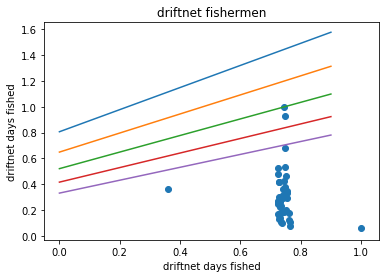

In [36]:
import matplotlib.pyplot as plt
import random

def calc_total_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b2 = 1.0
b1 = 1.0
b0 = 1.0
batchSize = 20

learn = 0.1

plt.xlabel('driftnet days fished')
plt.ylabel('driftnet days fished')
plt.title('driftnet fishermen')
plt.scatter(drift_X, drift_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(drift_X), batchSize)
sample_X = [drift_X[i] for i in sorted(batchSample)]
sample_Y = [drift_Y[i] for i in sorted(batchSample)]

for i in range(5):
    ERROR = mse(drift_X, drift_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b2_temp_error = mse(sample_X, sample_Y, calc_b2_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    b2 = adjustWeight(b2, learn, b2_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()